# 한눈에 보는 머신러닝

# 예제 1

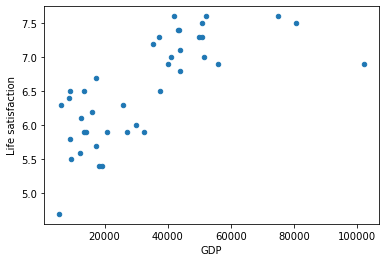

[[6.28176477]]


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

oecdBLI = pd.read_csv('rawData/BLI_10092020072350637.csv')
gdp = pd.read_csv('rawData/WEO_Data.csv',thousands=',')

oecdBLI=oecdBLI[oecdBLI["INEQUALITY"]=="TOT"].pivot(index="Country", columns="Indicator", values="Value")
gdp.rename(columns={"2015": "GDP"}, inplace=True)
gdp.set_index("Country", inplace=True)

bliGdp = pd.merge(oecdBLI, gdp, on="Country")
bliGdp.sort_values(by="GDP", inplace=True)

bliGdp=bliGdp[["GDP", 'Life satisfaction']]

X=np.c_[bliGdp["GDP"]]
Y=np.c_[bliGdp["Life satisfaction"]]

bliGdp.plot(kind='scatter', x="GDP", y='Life satisfaction')
plt.show()

model = sklearn.linear_model.LinearRegression()

model.fit(X, Y)

X_new = [[22587]]  # 키프로스 1인당 GDP
print(model.predict(X_new))

# 연습문제

### 1. 머신러닝이란?
    데이터로 부터 학습할 수 있는 시스템을 만드는 것
    * 학습이란?
        어떤 작업에서 주어진 성능 지표가 더 나아지는 것
                
### 2. 머신러닝이 도움 줄 수 있는 문제 유형 4가지
    1) 명확한 해결책이 없는 복잡한 문제
    2) 기존 솔루션으로는 많은 수동 조작을 요구하는 문제
    3) 유동적 환경의 문제
    4) 복잡한 문제와 대량의 데이터
        (ex. 데이터 마이닝)
        
### 3. 레이블된 훈련 세트란?
    레이블 : 셈플의 정답
        -> 지도학습의 정답 및 트레이닝의 정답

### 4. 보편적 지도학습 두 가지?
    1) 분류(classification) : 범주형 데이터
    2) 회귀(regression) : 연속형 데이터
    
### 5. 보편적인 비지도 학습 네 가지?
    1) 군집(clustering)
    2) 시각화(visualization)
    3) 차원축소(dimensionality reduction)
    4) 연관규칙 학습(assosiation rule learning)

### 6. 강화학습이란?
    에이전트(학습하는 시스템)가 환경을 관찰하여 행동을 실행하고 그 결과로 보상 또는 penalty를 부여
        -> 보상을 얻기 위한 정책(policy)를 스스로 학습
        -> 정책은 주어진 상황에서 에이전트가 어떤 행동을 선택해야 할지 정의
        

### 7. 그룹 분할
    1) 분류(classificaition) : 어떠한 기준으로 분류해야 할 줄 알 경우
    2) 군집(clustering) : 기준을 모를 때 비슷한 그룹으로 분할

### 8. 배치 학습(Batch Learning)이란?
    배치 학습에서는 시스템이 점진적으로 학습할 수 없음 -> 가용한 데이터를 모두 사용해 훈련
    이러한 방식은 시간과 자원을 많이 소모하여 일반적으로 오프라인에서 가동
    먼저 시스템을 훈련시키고 제품 시스템에 적용하면 더 이상의 학습 없이 실행
    즉, 학습한 것을 적용할 뿐
    이를 오프라인 학습(Offline Learning)이라고 함
    새로운 버전을 학습하려면 처음부터 다시 학습시켜야 함.

### 9. 온라인 학습(Online Learning)이란?
    데이터를 순차적으로 한 개씩 또는 미니 배치라 부르는 작은 묶음 단위로 주입하여 시스템을 훈련
    매 학습 단계가 빠르고 비용이 적게 들어 시스템은 데이터가 도착하는 대로 즉시 학습할 수 있다.
    
    배치 학습 시스템과 달리 점진적으로 학습할 수 있다.
    온라인 학습 시스템은 변화하는 데이터와 자율 시스템에 빠르게 적응하고 매우 많은 양의 데이터를 훈련 시킬 수 있다.


### 10. 외부 메모리 학습(out-of-core learning)이란?
    컴퓨터 주메모리에 들어갈 수 없는 대용량의 데이터를 다룰 수 있는 알고리즘
    데이터를 미니배치로 나누고 온라인 학습 기법을 사용하여 학습

### 11. 사례기반 학습(instance-based learning)이란?
    훈련데이터를 기억하는 학습
    새로운 샘플이 주어지면 유사도 측정을 사용, 학습된 샘플 중에서 가장 비슷한 것을 찾아 예측으로 사용
    
### 12. 모델 파라미터와 학습 알고리즘의 하이퍼파라미터의 차이?
    모델 파라미터 : 하나이상의 파라미터를 사용해 새로운 샘플이 주어지면 무엇을 예측할지 결정
                    학습 알고리즘은 모델이 새로운 샘플에 잘 일반화 되도록 이런 파라미터들의 최적값을 찾음
    
    하이퍼파라미터 : 모델이아니라 학습 알고리즘 자체의 파라미터 

### 13. 모델 기반 학습 알고리즘이란?
    새로운 샘플에 잘 일반화 되기 위한 모델 파라미터의 최적값을 찾음
    일반적으로 훈련데이터에서 시스템의 예측이 얼마나 나쁜지 측정하고 모델에 규제가 있다면 모델 복잡도에 대한 페널티를 더한 비용함수를
    최소화 함으로써 시스템을 훈련
    예측을 만들려면 학습알고리즘이 찾은 파라미터를 사용하는 모델의 예측함수에 새로운 샘플의 특성을 주입한다.
    
### 14. 머신러닝의 주요 도전과제
    부족한 데이터, 낮은 데이터 품질, 대표성 없는 데이터, 무의미한 특성, 
    훈련데이터에 과소적합된 과도하게 간단한 모델, 훈련데이터에 과대적합된 과도하게 복잡한 모델
    
### 15. 과대적합이란?
    모델이 훈련 데이터에서의 성능은 좋지만 새로운 샘플에서의 일반화 성능이 떨어질때.
    과대적합 해결 방법
    1) 더 많은 데이터 수집
    2) 모델 단순화
    3) 훈련데이터 잡음 제거
    
### 16. 테스트 세트란?
    실전에 배치되기 전에 모델이 새로운 샘플에 대해 만들 일반화 오차를 추정하기 위해 사용
    
### 17. 검증세트란?
    모델을 비교하는데 사용, 이를 이용해 가장 좋은 모델을 고르고 하이퍼 파라미터를 튜닝
    
### 18. 훈련-개발 세트란?
    검증, 테스트 세트에 사용되는 데이터와 훈련세트 사이에 데이터 불일치 위험이 있을때 사용
    훈련세트의 일부에서 모델을 훈련하고 훈련-개발 세트와 검증세트에서 평가
    모델이 훈련센트에서 잘 동작하지만 훈련-개발 세트에서 나쁜 성능을 낸다면 훈련세트에 과대적합되었을 가능성이 높음
    훈련 세트와 훈련-개발 세트에서 모두 잘 동작하지만 개발세트(검증세트)에서 성능ㅇ니 나쁘다면 훈련데이터와 검증+테스트 데이터 사이에
    데이터 불일치가 있을 가능성이 높다.
    
### 19. 테스트세트를 사용하지 않는 이유
    테스트 세트를 사용해 하이퍼파라미터를 튜닝하면 테스트 세트에 과대적합될 위험이 있고 일반화 오찰를 낙관적으로 측정
    실제 모델은 기대치보다 낮은 성능을 낼 것임